<a href="https://colab.research.google.com/github/ameermuhammed7777/Birds_Classification_using_CNN/blob/main/Birds_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import io

zip_file_name = "/content/birds.zip"

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("destination_folder")


In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.image import imread
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation,Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [4]:
path=("/content/destination_folder/AMERICAN GOLDFINCH")

In [5]:
listdir(path)

['101.jpg',
 '032.jpg',
 '076.jpg',
 '023.jpg',
 '016.jpg',
 '127.jpg',
 '100.jpg',
 '017.jpg',
 '084.jpg',
 '129.jpg',
 '003.jpg',
 '109.jpg',
 '065.jpg',
 '120.jpg',
 '019.jpg',
 '061.jpg',
 '030.jpg',
 '108.jpg',
 '091.jpg',
 '014.jpg',
 '002.jpg',
 '103.jpg',
 '137.jpg',
 '029.jpg',
 '140.jpg',
 '121.jpg',
 '039.jpg',
 '067.jpg',
 '111.jpg',
 '070.jpg',
 '136.jpg',
 '080.jpg',
 '094.jpg',
 '087.jpg',
 '096.jpg',
 '072.jpg',
 '040.jpg',
 '045.jpg',
 '012.jpg',
 '013.jpg',
 '033.jpg',
 '143.jpg',
 '015.jpg',
 '004.jpg',
 '139.jpg',
 '037.jpg',
 '132.jpg',
 '064.jpg',
 '089.jpg',
 '006.jpg',
 '141.jpg',
 '069.jpg',
 '048.jpg',
 '078.jpg',
 '020.jpg',
 '044.jpg',
 '088.jpg',
 '116.jpg',
 '075.jpg',
 '118.jpg',
 '005.jpg',
 '114.jpg',
 '125.jpg',
 '009.jpg',
 '035.jpg',
 '095.jpg',
 '135.jpg',
 '018.jpg',
 '107.jpg',
 '062.jpg',
 '133.jpg',
 '083.jpg',
 '122.jpg',
 '082.jpg',
 '031.jpg',
 '102.jpg',
 '117.jpg',
 '028.jpg',
 '051.jpg',
 '077.jpg',
 '079.jpg',
 '123.jpg',
 '066.jpg',
 '09

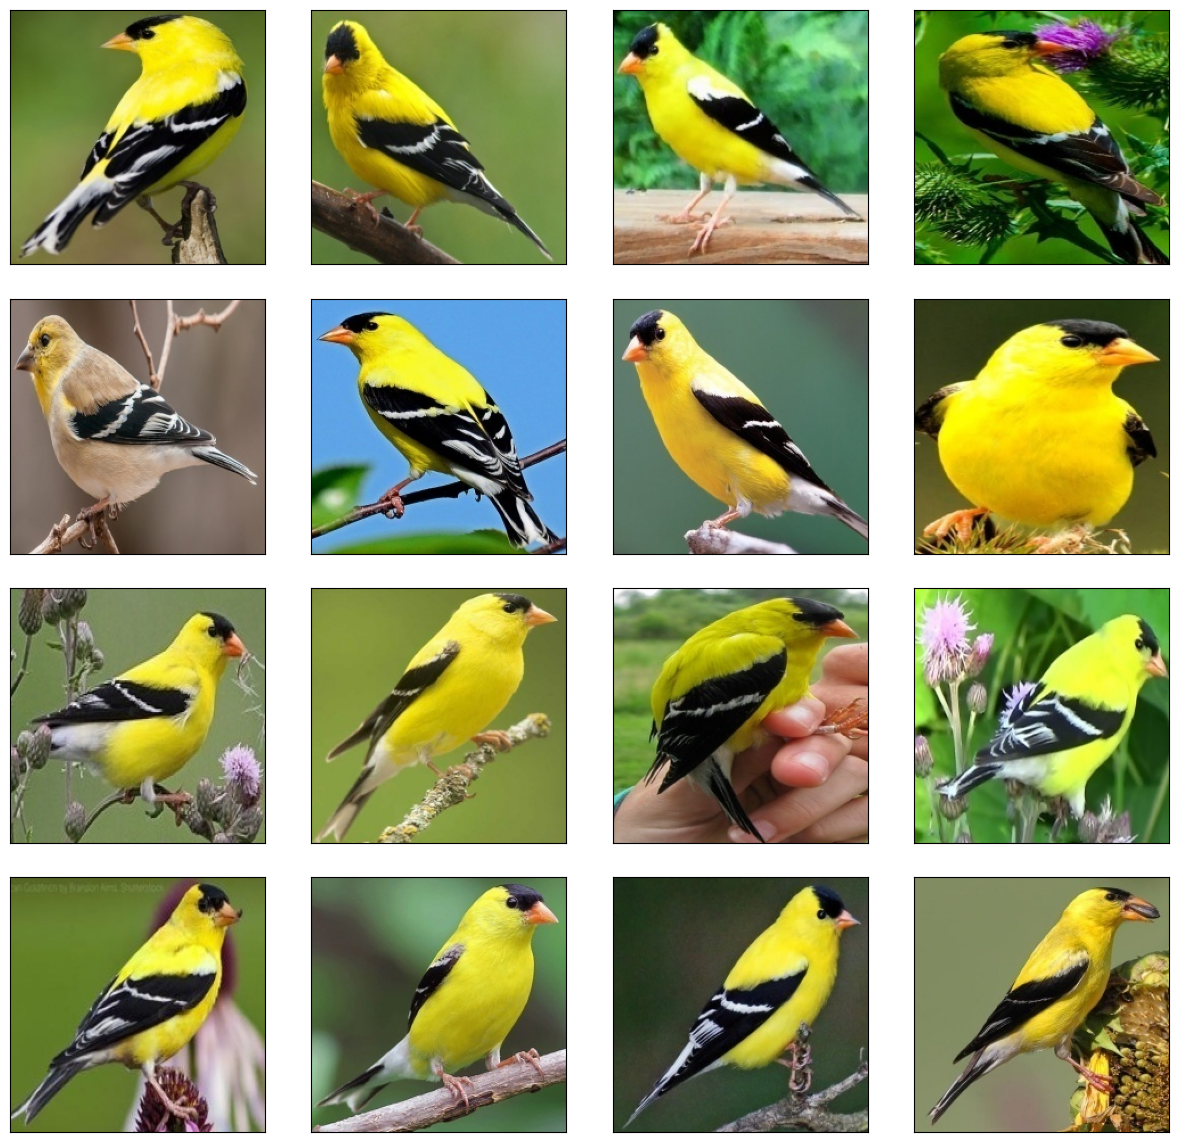

In [6]:
#Visualizing the Bird Species

plt.figure(figsize=(12,12))

for i in range(1,17):
    path='/content/destination_folder/AMERICAN GOLDFINCH'
    plt.subplot(4,4,i)
    plt.tight_layout()
    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    plt.xticks([])
    plt.yticks([])

In [7]:
#Data Pre-processing

dir="/content/destination_folder"
root_dir=listdir(dir)
image_list,label_list=[],[]

In [8]:
root_dir

['BARN OWL',
 'FLAMINGO',
 'EMPEROR PENGUIN',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'AMERICAN GOLDFINCH']

In [9]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path=f"{dir}/{directory}/{files}"

        image=cv2.imread(image_path)
        image=img_to_array(image)

        image_list.append(image)
        label_list.append(directory)

In [10]:
print(len(image_list))

811


In [11]:
image_list[0]

array([[[208., 194., 182.],
        [208., 194., 182.],
        [207., 193., 181.],
        ...,
        [211., 194., 185.],
        [212., 195., 186.],
        [213., 196., 187.]],

       [[208., 194., 182.],
        [207., 193., 181.],
        [207., 193., 181.],
        ...,
        [211., 194., 185.],
        [211., 194., 185.],
        [213., 196., 187.]],

       [[207., 193., 181.],
        [207., 193., 181.],
        [207., 193., 181.],
        ...,
        [211., 194., 185.],
        [211., 194., 185.],
        [212., 195., 186.]],

       ...,

       [[198., 182., 170.],
        [198., 182., 170.],
        [197., 181., 169.],
        ...,
        [206., 188., 177.],
        [205., 187., 176.],
        [203., 185., 174.]],

       [[198., 181., 172.],
        [197., 180., 171.],
        [197., 181., 169.],
        ...,
        [207., 187., 176.],
        [205., 187., 176.],
        [203., 185., 174.]],

       [[197., 180., 171.],
        [197., 180., 171.],
        [197., 1

In [12]:
label_list[0:4]

['BARN OWL', 'BARN OWL', 'BARN OWL', 'BARN OWL']

In [13]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

<Axes: ylabel='count'>

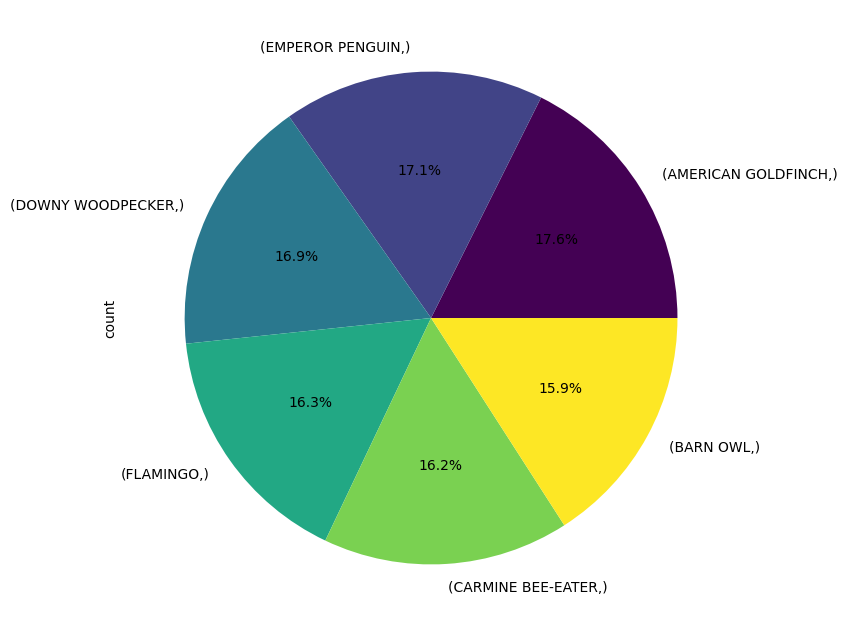

In [14]:
plt.figure(figsize=(10,8))
label_counts.plot(kind='pie',autopct="%.1f%%", cmap='viridis')

In [15]:
num_classes=len(label_counts)
num_classes

6

In [16]:
image_list[0].shape

(224, 224, 3)

In [17]:
label_list=np.array(label_list)
label_list.shape

(811,)

In [18]:
#Spliting the data into Training and Testing

X_train,X_test,Y_train,Y_test=train_test_split(image_list, label_list, test_size=0.3, random_state=0)

In [19]:
print(f"Number of Training datasets: {len(X_train)}\nNumber of Testing datasets: {len(X_test)}")

Number of Training datasets: 567
Number of Testing datasets: 244


In [20]:
X_train

[array([[[49., 93., 32.],
         [50., 94., 33.],
         [51., 96., 33.],
         ...,
         [46., 76., 27.],
         [45., 75., 26.],
         [44., 74., 25.]],
 
        [[48., 92., 31.],
         [49., 93., 32.],
         [50., 95., 32.],
         ...,
         [46., 76., 27.],
         [45., 75., 26.],
         [44., 74., 25.]],
 
        [[48., 92., 31.],
         [49., 93., 32.],
         [50., 95., 32.],
         ...,
         [47., 79., 30.],
         [46., 78., 29.],
         [45., 77., 28.]],
 
        ...,
 
        [[46., 74., 44.],
         [45., 73., 43.],
         [44., 72., 42.],
         ...,
         [42., 70., 41.],
         [43., 71., 42.],
         [43., 71., 42.]],
 
        [[49., 76., 43.],
         [48., 75., 42.],
         [48., 74., 44.],
         ...,
         [42., 66., 42.],
         [43., 67., 43.],
         [43., 68., 42.]],
 
        [[46., 70., 38.],
         [46., 70., 38.],
         [46., 70., 40.],
         ...,
         [40., 61., 39.],
  

In [21]:
#Normalization

X_train=np.array(X_train, dtype=np.float16)/ 255.0
X_test=np.array(X_test, dtype=np.float16)/ 255.0

X_train=X_train.reshape(-1, 224, 224, 3)
X_test=X_test.reshape(-1,224, 224, 3)

In [22]:
X_train[0]

array([[[0.1921, 0.3647, 0.1255],
        [0.196 , 0.3687, 0.1294],
        [0.2   , 0.3765, 0.1294],
        ...,
        [0.1804, 0.298 , 0.1059],
        [0.1765, 0.2942, 0.102 ],
        [0.1726, 0.2903, 0.098 ]],

       [[0.1882, 0.3608, 0.1216],
        [0.1921, 0.3647, 0.1255],
        [0.196 , 0.3726, 0.1255],
        ...,
        [0.1804, 0.298 , 0.1059],
        [0.1765, 0.2942, 0.102 ],
        [0.1726, 0.2903, 0.098 ]],

       [[0.1882, 0.3608, 0.1216],
        [0.1921, 0.3647, 0.1255],
        [0.196 , 0.3726, 0.1255],
        ...,
        [0.1843, 0.3098, 0.1177],
        [0.1804, 0.306 , 0.1137],
        [0.1765, 0.302 , 0.1098]],

       ...,

       [[0.1804, 0.2903, 0.1726],
        [0.1765, 0.2864, 0.1686],
        [0.1726, 0.2825, 0.1647],
        ...,
        [0.1647, 0.2744, 0.1608],
        [0.1686, 0.2783, 0.1647],
        [0.1686, 0.2783, 0.1647]],

       [[0.1921, 0.298 , 0.1686],
        [0.1882, 0.2942, 0.1647],
        [0.1882, 0.2903, 0.1726],
        .

In [23]:
#Label Binarizing

lb=LabelBinarizer()
Y_train=lb.fit_transform(Y_train)
Y_test=lb.fit_transform(Y_test)

print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [24]:
Y_train

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [25]:
Y_train.shape

(567, 6)

In [26]:
#model training (ANN)
#A)Build and compile the model


def load_model():

    model=Sequential([
        Flatten(input_shape=(224,224,3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

In [27]:
#B)To prone the overfit

early_stopping=callbacks.EarlyStopping(
    patience=10,
    min_delta=0,
    monitor='val_loss',
    restore_best_weights=True,
    verbose=0,
    mode='min',
    baseline=None,)
# This callback is used to reduce the learning rate when a metric has stopped improving
plateau=callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    verbose=0,
    mode='min')

In [28]:
#C)Model Training

ann_model=load_model()
history_ann=ann_model.fit(X_train, Y_train,validation_data=(X_test,Y_test),
                         epochs=1000,
                         callbacks=[early_stopping, plateau])

Epoch 1/1000
18/18 [==============================] - 30s 2s/step - loss: 30.5234 - acc: 0.1764 - val_loss: 9.5764 - val_acc: 0.2090 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 28s 2s/step - loss: 6.3521 - acc: 0.3721 - val_loss: 7.0867 - val_acc: 0.3566 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 27s 2s/step - loss: 3.1246 - acc: 0.4780 - val_loss: 1.8637 - val_acc: 0.5574 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 27s 2s/step - loss: 2.2849 - acc: 0.5379 - val_loss: 2.7052 - val_acc: 0.4508 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 27s 2s/step - loss: 2.0020 - acc: 0.5679 - val_loss: 2.4115 - val_acc: 0.5246 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 27s 2s/step - loss: 1.1456 - acc: 0.6984 - val_loss: 1.5248 - val_acc: 0.6189 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 27s 2s/step - loss: 1.3586 - acc: 0.6614 - val_loss

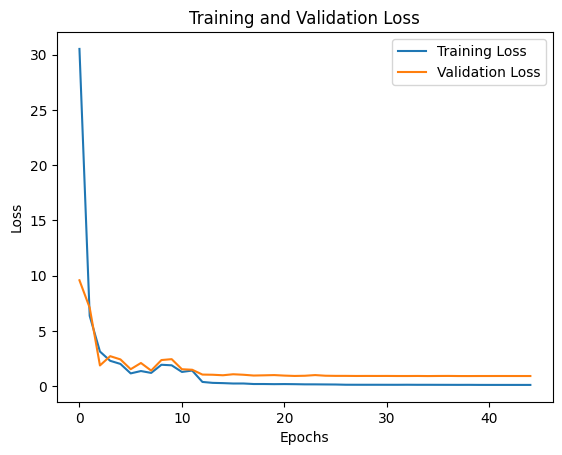

In [29]:
#4)Learning Curves
#1)loss

plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

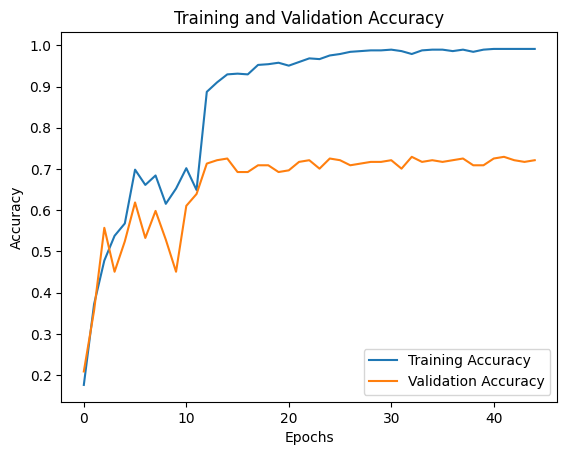

In [30]:
#2)Accuracy

plt.plot(history_ann.history['acc'], label='Training Accuracy')
plt.plot(history_ann.history['val_acc'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
#model training (CNN)
#A)Build and compile the model

def load_model():
    model=Sequential([
        Conv2D(8, (3,3), padding='same', input_shape=(224,224, 3), activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Conv2D(16, (3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3)),
        Conv2D(32, (3,3), padding='same',  activation='relu'),
        MaxPooling2D(pool_size=(3,3)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
    optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

In [32]:
#B)Prune to the Overfit

early_stopping=callbacks.EarlyStopping(
    patience=10,
    min_delta=0,
    monitor='val_loss',
    restore_best_weights=True,
    verbose=0,
    mode='min',
    baseline=None,
)
# This callback is used to reduce the learning rate when a metric has stopped improving
plateau=callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=4,
    verbose=0,
    mode='min'
)

In [33]:
#3)Model Training

nn_model=load_model()
historyy=nn_model.fit(X_train,Y_train, validation_data=(X_test,Y_test),
                    epochs=1000,
                    callbacks=[early_stopping, plateau])

Epoch 1/1000
18/18 [==============================] - 15s 745ms/step - loss: 1.7617 - acc: 0.2522 - val_loss: 1.7359 - val_acc: 0.1803 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 20s 1s/step - loss: 1.6362 - acc: 0.3228 - val_loss: 1.5416 - val_acc: 0.3934 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 13s 728ms/step - loss: 1.3517 - acc: 0.4974 - val_loss: 1.2296 - val_acc: 0.5820 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 13s 712ms/step - loss: 1.0685 - acc: 0.5944 - val_loss: 1.0191 - val_acc: 0.6311 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 15s 852ms/step - loss: 0.8600 - acc: 0.7178 - val_loss: 1.0003 - val_acc: 0.6475 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 14s 813ms/step - loss: 0.7698 - acc: 0.7249 - val_loss: 0.8974 - val_acc: 0.6885 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 12s 684ms/step - loss: 0.6442 - acc: 

In [34]:
#5)Model Accuracy

loss,acc=nn_model.evaluate(X_test,Y_test)

8/8 [==============================] - 2s 312ms/step - loss: 0.6870 - acc: 0.7582


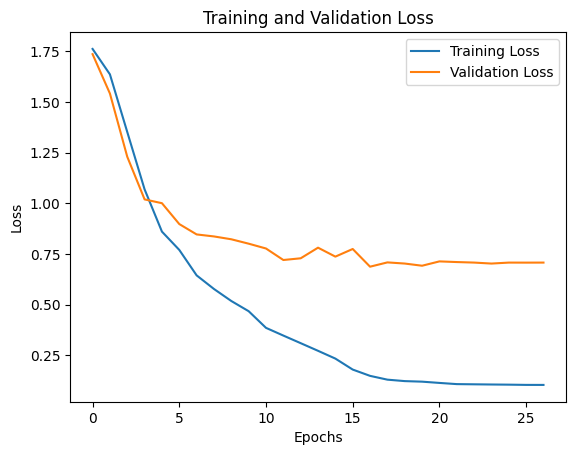

In [35]:
#6)Learning Curve
#Loss

plt.plot(historyy.history['loss'], label='Training Loss')
plt.plot(historyy.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

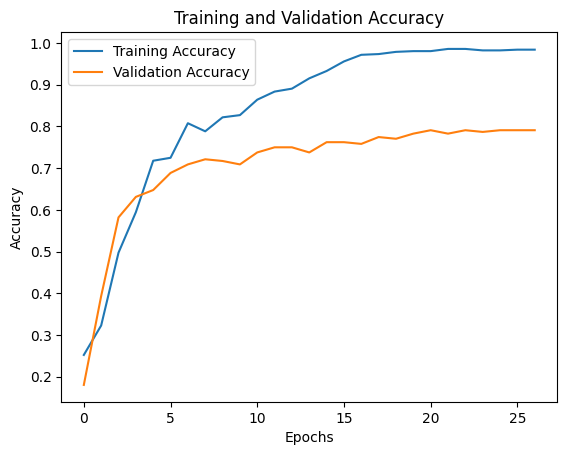

In [36]:
#Accuracy

plt.plot(historyy.history['acc'], label='Training Accuracy')
plt.plot(historyy.history['val_acc'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
#) Saving the Model

nn_model.save('bird.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
#)Predictions

y_pred=nn_model.predict(X_test)

8/8 [==============================] - 2s 242ms/step


In [39]:
y_predicted_labels=[np.argmax(i) for i in y_pred]

In [40]:
y_predicted_labels=np.array(y_predicted_labels)
y_predicted_labels.shape

(244,)

In [41]:
y_predicted_labels


array([3, 5, 1, 2, 1, 1, 2, 2, 5, 0, 3, 2, 3, 5, 0, 0, 2, 1, 5, 1, 0, 2,
       4, 2, 2, 5, 5, 0, 0, 3, 5, 5, 5, 5, 2, 4, 3, 0, 4, 0, 4, 0, 1, 2,
       3, 5, 3, 3, 1, 5, 5, 5, 4, 2, 4, 1, 4, 3, 3, 4, 3, 5, 4, 2, 2, 0,
       0, 0, 5, 0, 1, 2, 0, 0, 0, 5, 0, 0, 2, 2, 1, 0, 1, 3, 1, 3, 1, 5,
       0, 5, 3, 4, 3, 5, 2, 4, 2, 3, 0, 2, 3, 2, 2, 3, 3, 4, 0, 5, 0, 4,
       3, 3, 2, 3, 3, 2, 1, 4, 5, 5, 0, 4, 4, 5, 4, 0, 1, 5, 0, 3, 1, 0,
       2, 1, 2, 3, 2, 1, 3, 3, 5, 4, 5, 1, 3, 4, 0, 3, 4, 0, 2, 5, 0, 5,
       2, 4, 2, 0, 5, 1, 2, 2, 1, 1, 5, 5, 4, 3, 4, 2, 1, 4, 5, 5, 3, 1,
       2, 3, 5, 2, 0, 2, 5, 4, 3, 0, 5, 2, 5, 1, 1, 5, 4, 3, 5, 1, 3, 4,
       5, 5, 0, 2, 1, 4, 3, 0, 3, 3, 3, 0, 1, 2, 2, 3, 3, 4, 4, 5, 4, 0,
       0, 4, 2, 1, 5, 0, 1, 1, 5, 2, 0, 1, 5, 4, 4, 5, 5, 4, 3, 5, 4, 5,
       2, 2])

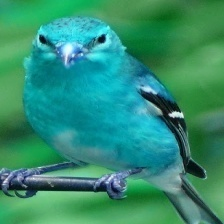

In [42]:
#Prediction Function
#First Example

img=array_to_img(X_test[14])
img

In [43]:
#Finding the Max value from prediction list and comparing original values vs predicted

labels=lb.classes_
print(labels)

print('Originally: ', labels[np.argmax(Y_test[14])])
print('Predicted: ', labels[np.argmax(y_pred[14])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally:  AMERICAN GOLDFINCH
Predicted:  AMERICAN GOLDFINCH


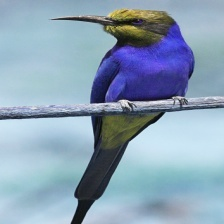

In [44]:
#Second Example

img=array_to_img(X_test[43])
img

In [45]:
labels=lb.classes_
print(labels)

print('Originally: ', labels[np.argmax(Y_test[43])])
print('Predicted: ', labels[np.argmax(y_pred[43])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally:  CARMINE BEE-EATER
Predicted:  CARMINE BEE-EATER


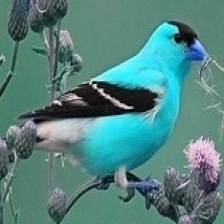

In [51]:
img=array_to_img(X_test[200])
img

In [47]:
labels=lb.classes_
print(labels)

print('Originally: ', labels[np.argmax(Y_test[200])])
print('Predicted: ', labels[np.argmax(y_pred[200])])


['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally:  AMERICAN GOLDFINCH
Predicted:  AMERICAN GOLDFINCH
